In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

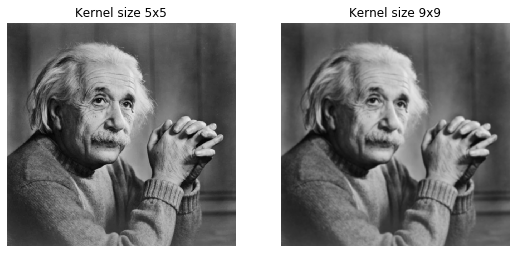

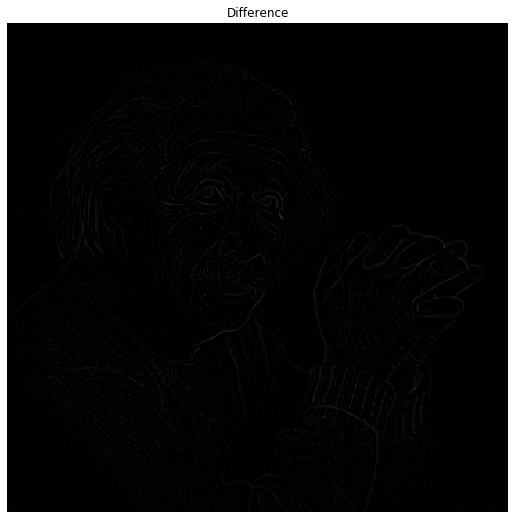

In [21]:
img=cv2.imread("einstein.jpg")
im1=cv2.GaussianBlur(img, (5,5), 0)
plt.figure(figsize=(9, 9))
plt.subplot(121),plt.axis("off"),plt.title("Kernel size 5x5"),plt.imshow(im1)
im2=cv2.GaussianBlur(img, (9,9), 0)
plt.subplot(122),plt.axis("off"),plt.title("Kernel size 9x9"),plt.imshow(im2)
im3=cv2.subtract(im2,im1)
plt.figure(figsize=(9, 9)),plt.axis("off"),plt.title("Difference"),plt.imshow(im3)
plt.show()

In [42]:
vid=cv2.VideoCapture("Video.mp4")
barrel=cv2.imread("Barrel.jpg")
hsv_bar = cv2.cvtColor(barrel, cv2.COLOR_RGB2HSV)
bar_hist=cv2.calcHist([hsv_bar],[0,1],None,[180, 256],[0, 180, 0, 256])
cv2.normalize(bar_hist,bar_hist, 0, 255, cv2.NORM_MINMAX, -1,None)
while True:
    ret,frame=vid.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
    mask = cv2.calcBackProject([hsv], [0, 1], bar_hist, [0, 180, 0, 256], 1)
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    cv2.filter2D(mask, -1, disc,mask)
    _, mask = cv2.threshold(mask, 200, 255, cv2.THRESH_BINARY)
    mask = cv2.merge((mask, mask, mask))
    result = cv2.bitwise_and(frame, mask)
    cv2.imshow("Result", result)
    if cv2.waitKey(1) & 0xFF == ord('q'): #Press q to exit 
        break
    if cv2.waitKey(1) & 0xFF == 27: #press esc to exit
        break
vid.release()
cv2.destroyAllWindows()

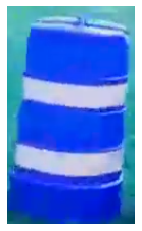

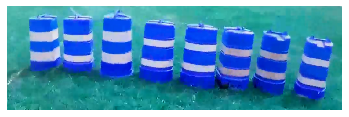

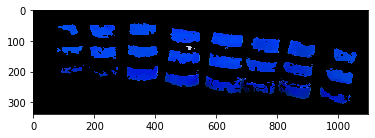

In [39]:
barrel=cv2.imread("part.png")
plt.imshow(barrel),plt.axis("off")
plt.show()
frame=cv2.imread("Original.png")
plt.imshow(frame),plt.axis("off")
plt.show()
hsv_bar = cv2.cvtColor(barrel, cv2.COLOR_BGR2HSV)
bar_hist=cv2.calcHist([hsv_bar],[0,1],None,[180, 256],[0, 180, 0, 256])
cv2.normalize(bar_hist,bar_hist, 0, 254, cv2.NORM_MINMAX, -1,None)
hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
mask = cv2.calcBackProject([hsv], [0, 1], bar_hist, [0, 180, 0, 256], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(mask, -1, disc,mask)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(frame, mask)
plt.imshow(result)
plt.show()